<h2>Loading Packages</h2>

In [1]:
import spacy 
import numpy as np 
from spacy.vocab import Vocab 
  
nlp = spacy.load('en_core_web_md') 
new_word = 'bucrest'
  
print('Before custom setting') 
print(vocab.get_vector('bucrest')) 
  
custom_vector = np.random.uniform(-1, 1, (300, )) 
  
vocab.set_vector(new_word, custom_vector) 
  
print('After custom setting') 
print(vocab.get_vector('bucrest')) 

OSError: ignored

In [0]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns


import requests
import io


plt.style.use('seaborn-whitegrid')

Loading the Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/clean kaggle data/data_v2.csv')
metadata = pd.read_csv('/content/drive/My Drive/clean kaggle data/all_sources_metadata_2020-03-13.csv')

In [0]:
data = data.drop(['raw_authors','raw_bibliography'],axis=1)
data.head()

,source,paper_id,title,authors,affiliations,abstract,text,bibliography,location,institution
0,biorxiv_medrxiv,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,"Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...","Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...",word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",Genetic economy in 598 picornaviruses: Foot-an...,[],[]
1,biorxiv_medrxiv,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, â ...","Hanchu Zhou (Hong Kong, China), Jiannan Yang (...",NaN,The 2019-nCoV epidemic has spread across China...,World Health Organizations. Novel Coronavirus ...,"[{'Hong Kong', 'China'}, {'Beijing', 'China'}]","['City University of Hong Kong', 'Chinese Acad..."
2,biorxiv_medrxiv,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (30602, Athens, GA, USA), Eric C...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...",Emergence of novel strains of avian infectious...,"[{'Blacksburg', '24061', 'USA', 'VA'}, {'USA',...",['Virginia Polytechnical Institute and State U...
3,biorxiv_medrxiv,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (UK), Isaac I Bogoch (Toronto, Ca...",Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p...",A Novel Coronavirus Genome Identified in a Clu...,"[{'China', 'Changsha'}, {'China', 'Shanghai'},...","[""St. Michael's Hospital"", 'National Universit..."
4,biorxiv_medrxiv,01d162d7fae6aaba8e6e60e563ef4c2fca7b0e18,"TWIRLS, an automated topic-wise inference meth...","Xiaoyang Ji, Chunming Zhang, Yubo Zhai, Zhongh...","Xiaoyang Ji (Beijing, China), Chunming Zhang (...",Faced with the current large-scale public heal...,The sudden outbreak of the new coronavirus (SA...,A pneumonia outbreak associated with a new cor...,"[{'Beijing', 'China'}]","['Phil Rivers Technology', 'Chinese Academy of..."


In [0]:
metadata.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False


In [0]:
print('shape:',data.shape)
data.isnull().sum()

shape: (13202, 10)


source             0
paper_id           0
title            943
authors          861
affiliations     861
abstract        2073
text               0
bibliography       0
location           0
institution        0
dtype: int64

In [0]:
data.nunique()

source              4
paper_id        13202
title           12098
authors         12122
affiliations    12252
abstract        11112
text            13192
bibliography    12020
location         7086
institution      6171
dtype: int64

In [0]:
print('shape:',metadata.shape)
metadata.isnull().sum()

shape: (29500, 14)


sha                            12080
source_x                           0
title                            370
doi                             3143
pmcid                           2163
pubmed_id                      12770
license                        11808
abstract                        2947
publish_time                   11252
authors                          946
journal                        11709
Microsoft Academic Paper ID    28366
WHO #Covidence                 28264
has_full_text                  12080
dtype: int64

In [0]:
metadata.nunique()

sha                            17398
source_x                           4
title                          24654
doi                            22203
pmcid                          23222
pubmed_id                      12607
license                           15
abstract                       22453
publish_time                    4499
authors                        23860
journal                         1732
Microsoft Academic Paper ID      872
WHO #Covidence                  1223
has_full_text                      2
dtype: int64

<h2>EDA <h2>

<h5> Metadata Analysis</h5>

Total Count: 29500
Source Details: 
PMC        27337
CZI         1236
biorxiv      566
medrxiv      361
Name: source_x, dtype: int64


Text Details: 
True     13219
False     4201
Name: has_full_text, dtype: int64


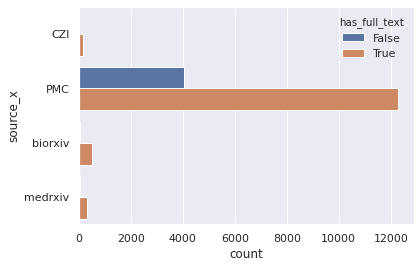

In [0]:
import seaborn as sns
sns.set(style="darkgrid")

print('Total Count:' , metadata.shape[0])

print('Source Details: ')
print(metadata['source_x'].value_counts())

print('\n\nText Details: ')
print(metadata['has_full_text'].value_counts())
ax = sns.countplot(y="source_x", hue="has_full_text", data=metadata)

PLoS One                          2204
Emerg Infect Dis                   941
Sci Rep                            800
PLoS Pathog                        729
Viruses                            638
Virol J                            398
mBio                               330
BMC Infect Dis                     280
Nucleic Acids Res                  274
PLoS Negl Trop Dis                 227
Front Immunol                      225
Front Microbiol                    217
PLoS Comput Biol                   215
Nat Commun                         184
BMC Vet Res                        173
BMC Public Health                  168
Emerg Microbes Infect              155
BMJ Open                           153
Influenza Other Respir Viruses     151
PLoS Med                           137
BMC Genomics                       132
Int J Mol Sci                      129
Molecules                          121
BMC Bioinformatics                 117
Vet Res                             96
Name: journal, dtype: int

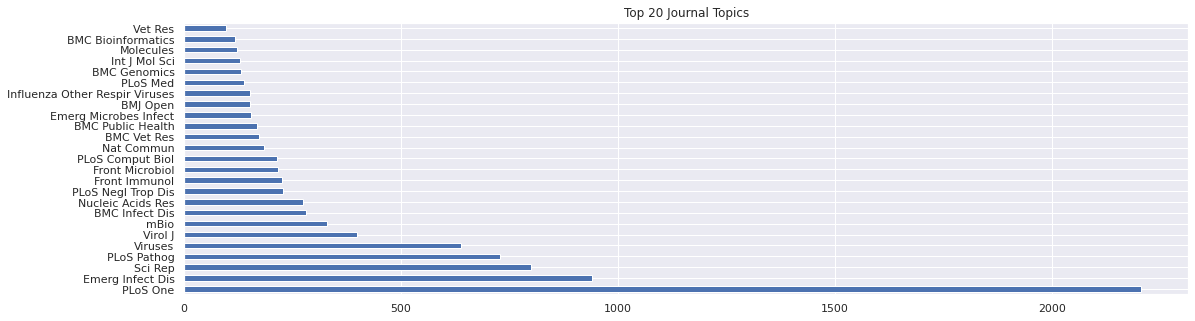

In [0]:
metadata['journal'].value_counts()[:25].plot(figsize=(18,5),kind='barh',title='Top 20 Journal Topics')
print(metadata['journal'].value_counts()[:25])

**What are the top journal topics?**


1.   PLoS One- PLOS One is a peer-reviewed open access scientific journal published by the Public Library of Science since 2006. The journal covers primary research from any discipline within science and medicine.

2.   Emerg Infect Dis - Emerging Infectious Diseases is an open-access, peer-reviewed journal published by the Centers for Disease Control and Prevention. EID is a public domain journal and covers global instances of new and reemerging infectious diseases, putting greater emphasis on disease emergence, prevention, control, and elimination. 

3.   Sci Rep  -Scientific Reports is an online open access scientific mega journal published by Nature Research, covering all areas of the natural sciences. The journal aims to assess solely the scientific validity of a submitted paper, rather than its perceived importance, significance or impact.

4.   PLoS Pathog - PLOS Pathogens is a peer-reviewed open-access medical journal. All content in PLOS Pathogens is published under the Creative Commons "by-attribution" license. PLOS Pathogens began operation in September 2005.









In [0]:
import re
clean_dates = []
dates = metadata['publish_time'].values
for date in dates:
   try:
       date = str(date)
       if date != 'nan':
           match = re.search(r"(\d{4})", date)
#             print(date, match[0])
           if match:
               clean_dates.append(match[0])
       else:
           clean_dates.append(None)
   except ValueError as e:
       pass
   

for date in clean_dates[:5]:
   print(date)

2020
2020
2020
2020
2020


In [0]:
import dateutil.parser as parser

clean_dates = []
dates = metadata['publish_time'].values
for date in dates:
    try:
        date = parser.parse(str(date),fuzzy=True).year
    except ValueError as e:
        pass
    clean_dates.append(date)

for date in clean_dates[:5]:
    print(date)

2020
2020
2020
2020
2020


In [0]:
metadata['publish_year'] = clean_dates
metadata.isnull().sum()

sha                            12080
source_x                           0
title                            370
doi                             3143
pmcid                           2163
pubmed_id                      12770
license                        11808
abstract                        2947
publish_time                   11252
authors                          946
journal                        11709
Microsoft Academic Paper ID    28366
WHO #Covidence                 28264
has_full_text                  12080
publish_year                   11252
dtype: int64

In [0]:
metadata.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,publish_year
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True,2020
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True,2020
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True,2020
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True,2020
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False,2020


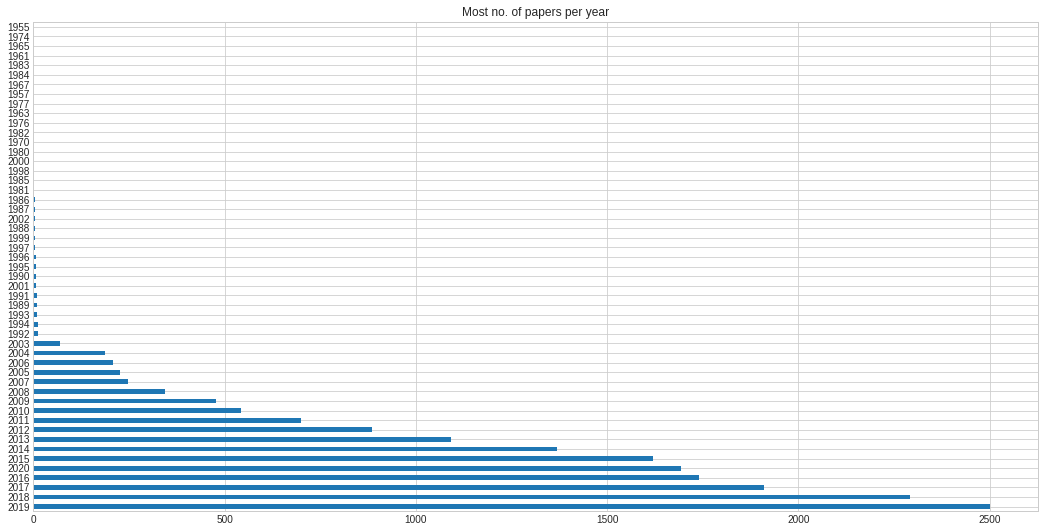

In [0]:
metadata['publish_year'].value_counts().plot(figsize=(18,9),kind='barh',title='Most no. of papers per year')

# Datetime is getting misplaced after parsing to datetime.
total = 6753 (11252 - 4499) 

In [0]:

import dateutil.parser as parser
import re

clean_dates = []
dates = metadata['publish_time'].values
for date in dates:
    try:
        date = str(date)
        if date != 'None':
            match = re.search(r"(\d{4})", date)
            if match:
                clean_dates.append(match).group(0)
        else:
            clean_dates.append(None)
    except ValueError as e:
        pass
    

for date in clean_dates[:5]:
    print(date)

AttributeError: ignored

<h4> JSON Data Analysis<h4>

Source Details: 
Total Count: 13202
comm_use_subset       9000
noncomm_use_subset    1973
pmc_custom_license    1426
biorxiv_medrxiv        803
Name: source, dtype: int64


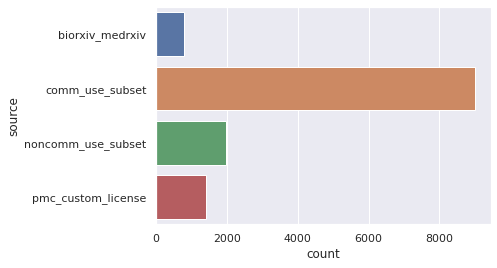

In [0]:
print('Source Details: ')
print('Total Count:', data.shape[0] )
print(data['source'].value_counts())
ax = sns.countplot(y="source", data=data)

<h2> Text Processing </h2>

In [0]:
texts = data['text'].to_list()
for text in texts[:10]:
    print(text) 

VP3, and VP0 (which is further processed to VP2 and VP4 during virus assembly) (6). The P2 64 and P3 regions encode the non-structural proteins 2B and 2C and 3A, 3B (1-3) (VPg), 3C pro and 4 structural protein-coding region is replaced by reporter genes, allow the study of genome 68 replication without the requirement for high containment (9, 10) ( figure 1A ).The FMDV 5â² UTR is the largest known picornavirus UTR, comprising approximately 1300 71 nucleotides and containing several highly structured regions. The first 360 nucleotides at the 5â² 72 end are predicted to fold into a single large stem loop termed the S-fragment, followed by a The PKs were originally predicted in 1987 and consist of two to four tandem repeats of a ~48 86 nucleotide region containing a small stem loop and downstream interaction site (figure 1B) 87 (12). Due to the sequence similarity between the PKs (figure 1C), it is speculated that they 88 were formed by duplication events during viral replication, proba

shape: (13202, 10)


source             0
paper_id           0
title            943
authors          861
affiliations     861
abstract        2073
text               0
bibliography       0
location           0
institution        0
dtype: int64

In [0]:
import re
from bs4 import BeautifulSoup

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'

In [0]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'm' ,'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'hi', 'hello','he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","from","to","wa","ha",\
            #additional from the contents
            'de','q','may','cc-by 4.0','et','al','p', 'n','author','funder','4.0 international','medrxiv','preprint'
            ])

In [0]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
def lemma_text(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [0]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Cleaning Texts of Train Dataset

# Combining all the above stundents 
from tqdm import tqdm
texts_clean = []
# tqdm is for printing the status bar
for sentance in tqdm(data['text'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = lemma_text(sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    texts_clean.append(sentance.strip())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


100%|██████████| 13202/13202 [06:49<00:00, 32.23it/s]


In [0]:
for text in texts[:10]:
    print(text) 

VP3, and VP0 (which is further processed to VP2 and VP4 during virus assembly) (6). The P2 64 and P3 regions encode the non-structural proteins 2B and 2C and 3A, 3B (1-3) (VPg), 3C pro and 4 structural protein-coding region is replaced by reporter genes, allow the study of genome 68 replication without the requirement for high containment (9, 10) ( figure 1A ).The FMDV 5â² UTR is the largest known picornavirus UTR, comprising approximately 1300 71 nucleotides and containing several highly structured regions. The first 360 nucleotides at the 5â² 72 end are predicted to fold into a single large stem loop termed the S-fragment, followed by a The PKs were originally predicted in 1987 and consist of two to four tandem repeats of a ~48 86 nucleotide region containing a small stem loop and downstream interaction site (figure 1B) 87 (12). Due to the sequence similarity between the PKs (figure 1C), it is speculated that they 88 were formed by duplication events during viral replication, proba

In [0]:
for text in texts_clean[:10]:
    print(text) 

processed virus assembly region encode non structural protein vpg pro structural protein coding region replaced reporter gene allow study genome replication without requirement high containment figure fmdv utr largest known picornavirus utr comprising approximately nucleotide containing several highly structured region first nucleotide end predicted fold single large stem loop termed fragment followed pks originally predicted consist two four tandem repeat nucleotide region containing small stem loop downstream interaction site figure due sequence similarity pks figure speculated formed duplication event viral replication probably involving recombination two four pks present different virus isolates no strain ha identified le two pks emphasising potential importance viral life cycle presence pks ha reported utr picornavirus right reserved no reuse allowed without permission occur absence pks least one required wild type wt replication furthermore competition experiment showed extra cop

In [0]:
# so let's check the longest text 

longest_text = max(texts_clean,key=len)
print('Max length of a Text :',len(longest_text))
print('\n',longest_text)

Max length of a Text : 1523879

 nel promuovere e gestire cambiamenti necessari per coniugare pratiche sicure ed efficaci con l efficienza l equit e la sostenibilit dei servizi sanitari essenziale la conoscenza la diffusione e l adesione alle raccomandazioni per la pratica professionale derivanti da linee guida lg italia la legge disposizioni materia di sicurezza delle cure e della persona assistita nonch materia di responsabilit professionale degli esercenti le professioni sanitarie stabilendo che gli esercenti le professioni sanitarie nell esecuzione delle prestazioni sanitarie con finalit preventive diagnostiche terapeutiche palliative riabilitative e di medicina legale si attengono salve le specificit del caso concreto alle raccomandazioni previste dalle linee guida pubblicate ed elaborate da enti e istituzioni pubblici e privati nonch dalle societ scientifiche e dalle associazioni tecnicoscientifiche delle professioni sanitarie iscritte apposito elenco ha rinnovato l impulso legis

In [0]:
text_df = pd.DataFrame({'text':texts_clean})
text_df.head()

,text
0,processed virus assembly region encode non str...
1,epidemic ha spread across china country februa...
2,infectious bronchitis ib caused infectious bro...
3,december cluster patient pneumonia unknown cau...
4,sudden outbreak new coronavirus end december p...


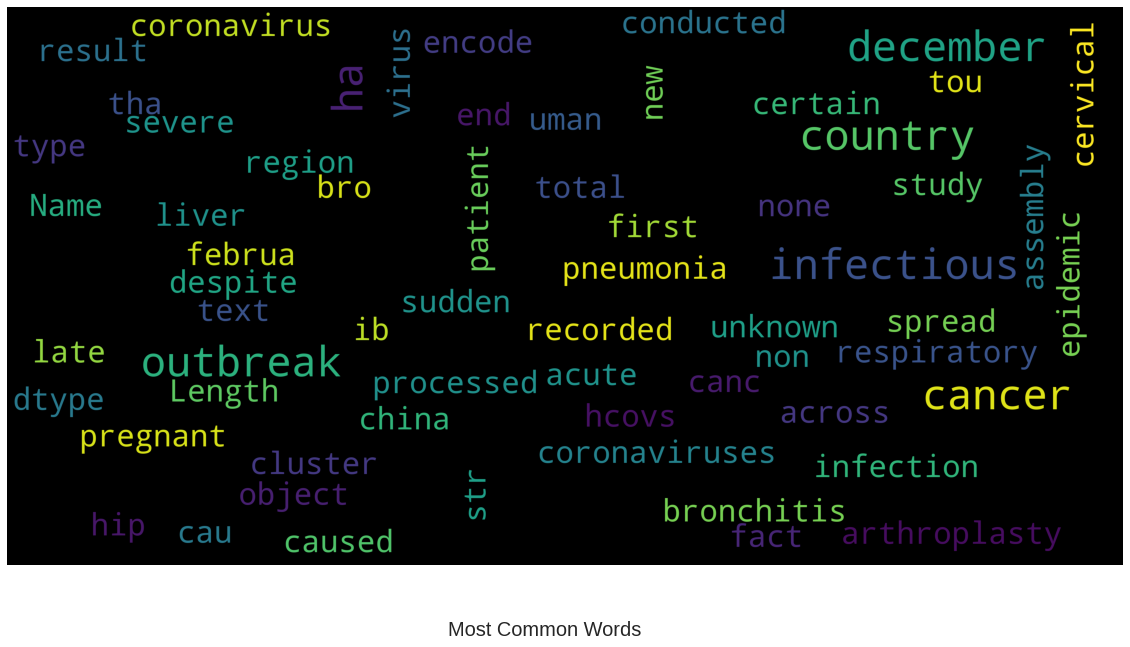

In [0]:
from wordcloud import WordCloud

def display_wordCloud(train, title = None):
    wordcloud = WordCloud(background_color = 'black',
                         stopwords = stopwords,
                         max_words = 100,
                         max_font_size = 15,
                         scale = 10,
                         random_state = 2).generate(str(train))
    fig = plt.figure(1,figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

display_wordCloud(text_df['text'],'Most Common Words ')

<h2> 
Featurization</h2>

Uni-grams

cell 324996
from 284573
virus 232756
protein 176570
infection 174328
not 170417
study 167689
using 129179
viral 117942
also 117461
ha 117087
patient 110670
data 102008
used 101899
disease 100599
figure 93650
gene 93126
human 92317
case 85732
group 83817


 PRINTING THE TOP 20 UNIGRAMS


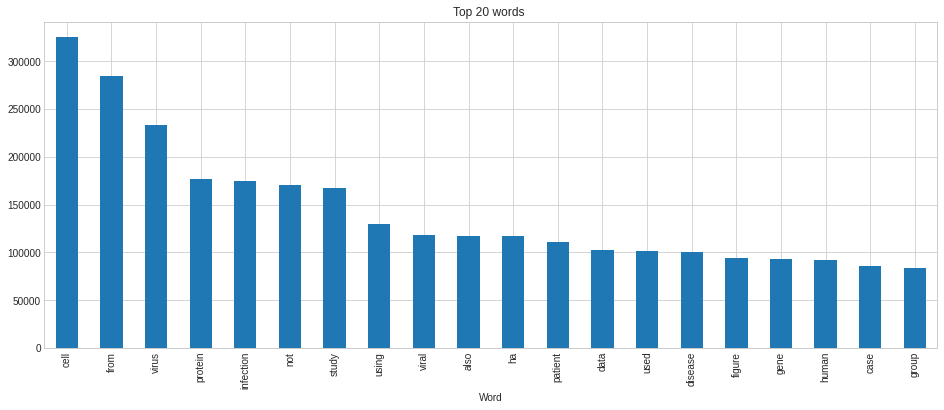

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1), min_df=10).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(text_df['text'], 20)
for word, freq in common_words:
    print(word, freq)


top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
print('\n\n PRINTING THE TOP 20 UNIGRAMS')
top_words.groupby('Word').sum()['Count'].sort_values(ascending=False).plot(figsize=(16,6), kind='bar', title='Top 20 words ')


Bi-grams and N-grams

mers cov 21687
influenza virus 20547
amino acid 19007
immune response 18222
sars cov 16408
public health 16160
infected cell 13517
infectious disease 12391
cell line 11727
rt pcr 11638
viral infection 11581
doe not 10886
obtained from 10348
real time 10105
wild type 9686
viral rna 8769
previous study 8759
gene expression 8644
peer reviewed 8310
derived from 8285


 PRINTING THE TOP 20 BIGRAMS


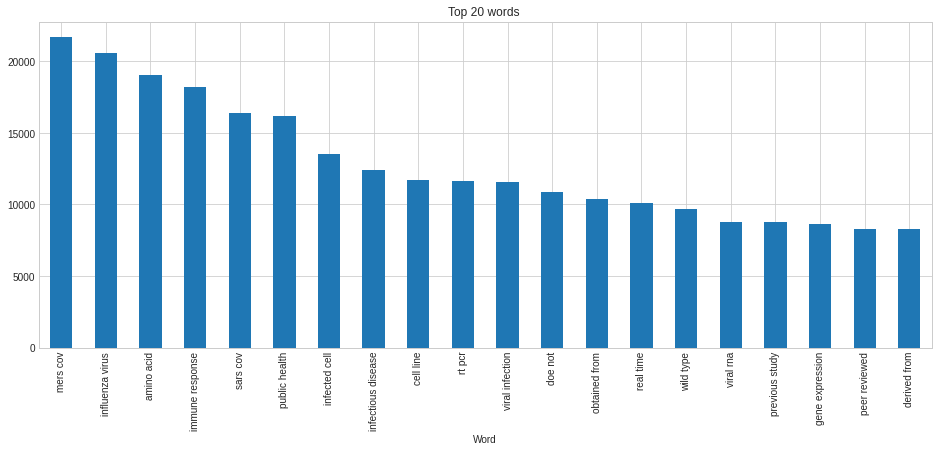

In [0]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), min_df=10).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(text_df['text'], 20)
for word, freq in common_words:
    print(word, freq)

top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
print('\n\n PRINTING THE TOP 20 BIGRAMS')
top_words.groupby('Word').sum()['Count'].sort_values(ascending=False).plot(figsize=(16,6), kind='bar', title='Top 20 words ')


not peer reviewed 7876
copyright holder not 6652
holder not peer 6642
data not shown 6019
peer reviewed doi 5743
reviewed doi biorxiv 5030
real time pcr 4128
severe acute respiratory 4042
acute respiratory syndrome 3747
according manufacturer instruction 3444
play important role 3192
international license made 3175
license made available 3175
no significant difference 2969
amino acid sequence 2841
ha granted license 2808
license display perpetuity 2807
granted license display 2804
reserved no reuse 2766
no reuse allowed 2766


 PRINTING THE TOP 20 TRIGRAMS


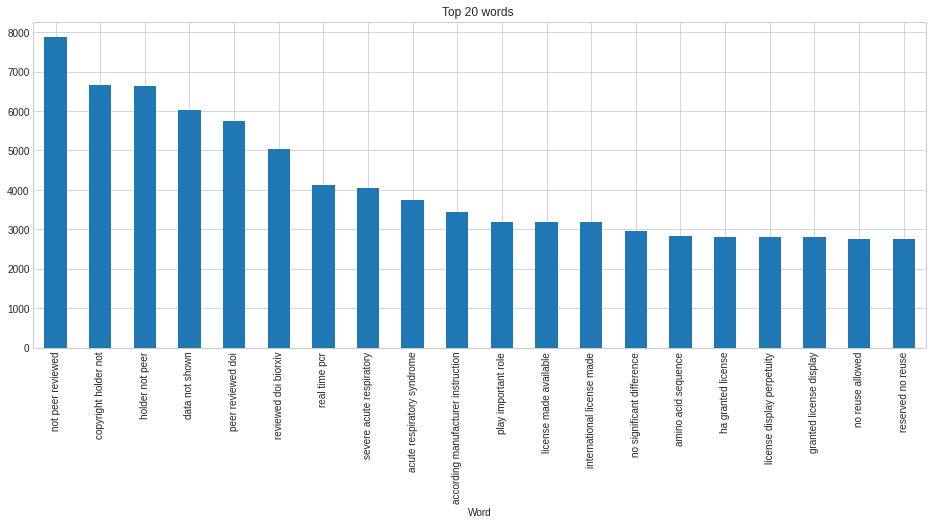

In [0]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), min_df=10).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(text_df['text'], 20)
for word, freq in common_words:
    print(word, freq)

top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
print('\n\n PRINTING THE TOP 20 TRIGRAMS')
top_words.groupby('Word').sum()['Count'].sort_values(ascending=False).plot(figsize=(16,6), kind='bar', title='Top 20 words ')


Understanding The Text

In [0]:
text_n = pd.Series(text_df['text'].tolist() )
unique_sent = len(np.unique(text_n))
sent_gt_one = np.sum(text_n.value_counts() > 1)
print ('Total number of  Unique Texts are: {}\n'.format(unique_sent))
#print len(np.unique(text_n))

print ('Number of unique texts that appear more than one time: {} ({}%)\n'.format(sent_gt_one,sent_gt_one/unique_sent*100))

print ('Max number of times a single text is repeated: {}\n'.format(max(text_n.value_counts()))) 

text_vals=text_n.value_counts()

text_vals=text_vals.values

Total number of  Unique Texts are: 13181

Number of unique texts that appear more than one time: 12 (0.09104013352552917%)

Max number of times a single text is repeated: 11



In [0]:
print(text_df['text'].dropna().describe())

count     13202
unique    13181
top            
freq         11
Name: text, dtype: object


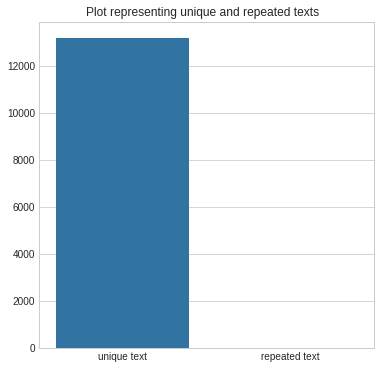

In [0]:
x = ["unique text" , "repeated text"]
y =  [unique_sent , sent_gt_one]

plt.figure(figsize=(6, 6))
plt.title ("Plot representing unique and repeated texts  ")
sns.barplot(x,y)
plt.show()